# Load Dataset

In [1]:
import pandas as pd

# Memuat dataset CSV
df = pd.read_csv('diabetes.csv')

# Menampilkan 5 baris pertama dari dataset
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


# Periksa Dimensi Dataset

In [2]:
df.shape

(768, 9)

# Periksa Tipe Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Periksa Ringkasan Statistik

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Periksa Nilai Unik di Kolom Tertentu (Outcome)

In [5]:
cols = ['Outcome']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

Outcome has [1 0] values



# Validasi Data

# Cek Missing Values di Setiap Kolom

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Cek Data Duplikat

In [7]:
# Mengecek jumlah duplikat di seluruh dataset
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah data duplikat: {jumlah_duplikat}")

Jumlah data duplikat: 0


# Visualisasi Distribusi Data

# Visualisasi Pair Plot

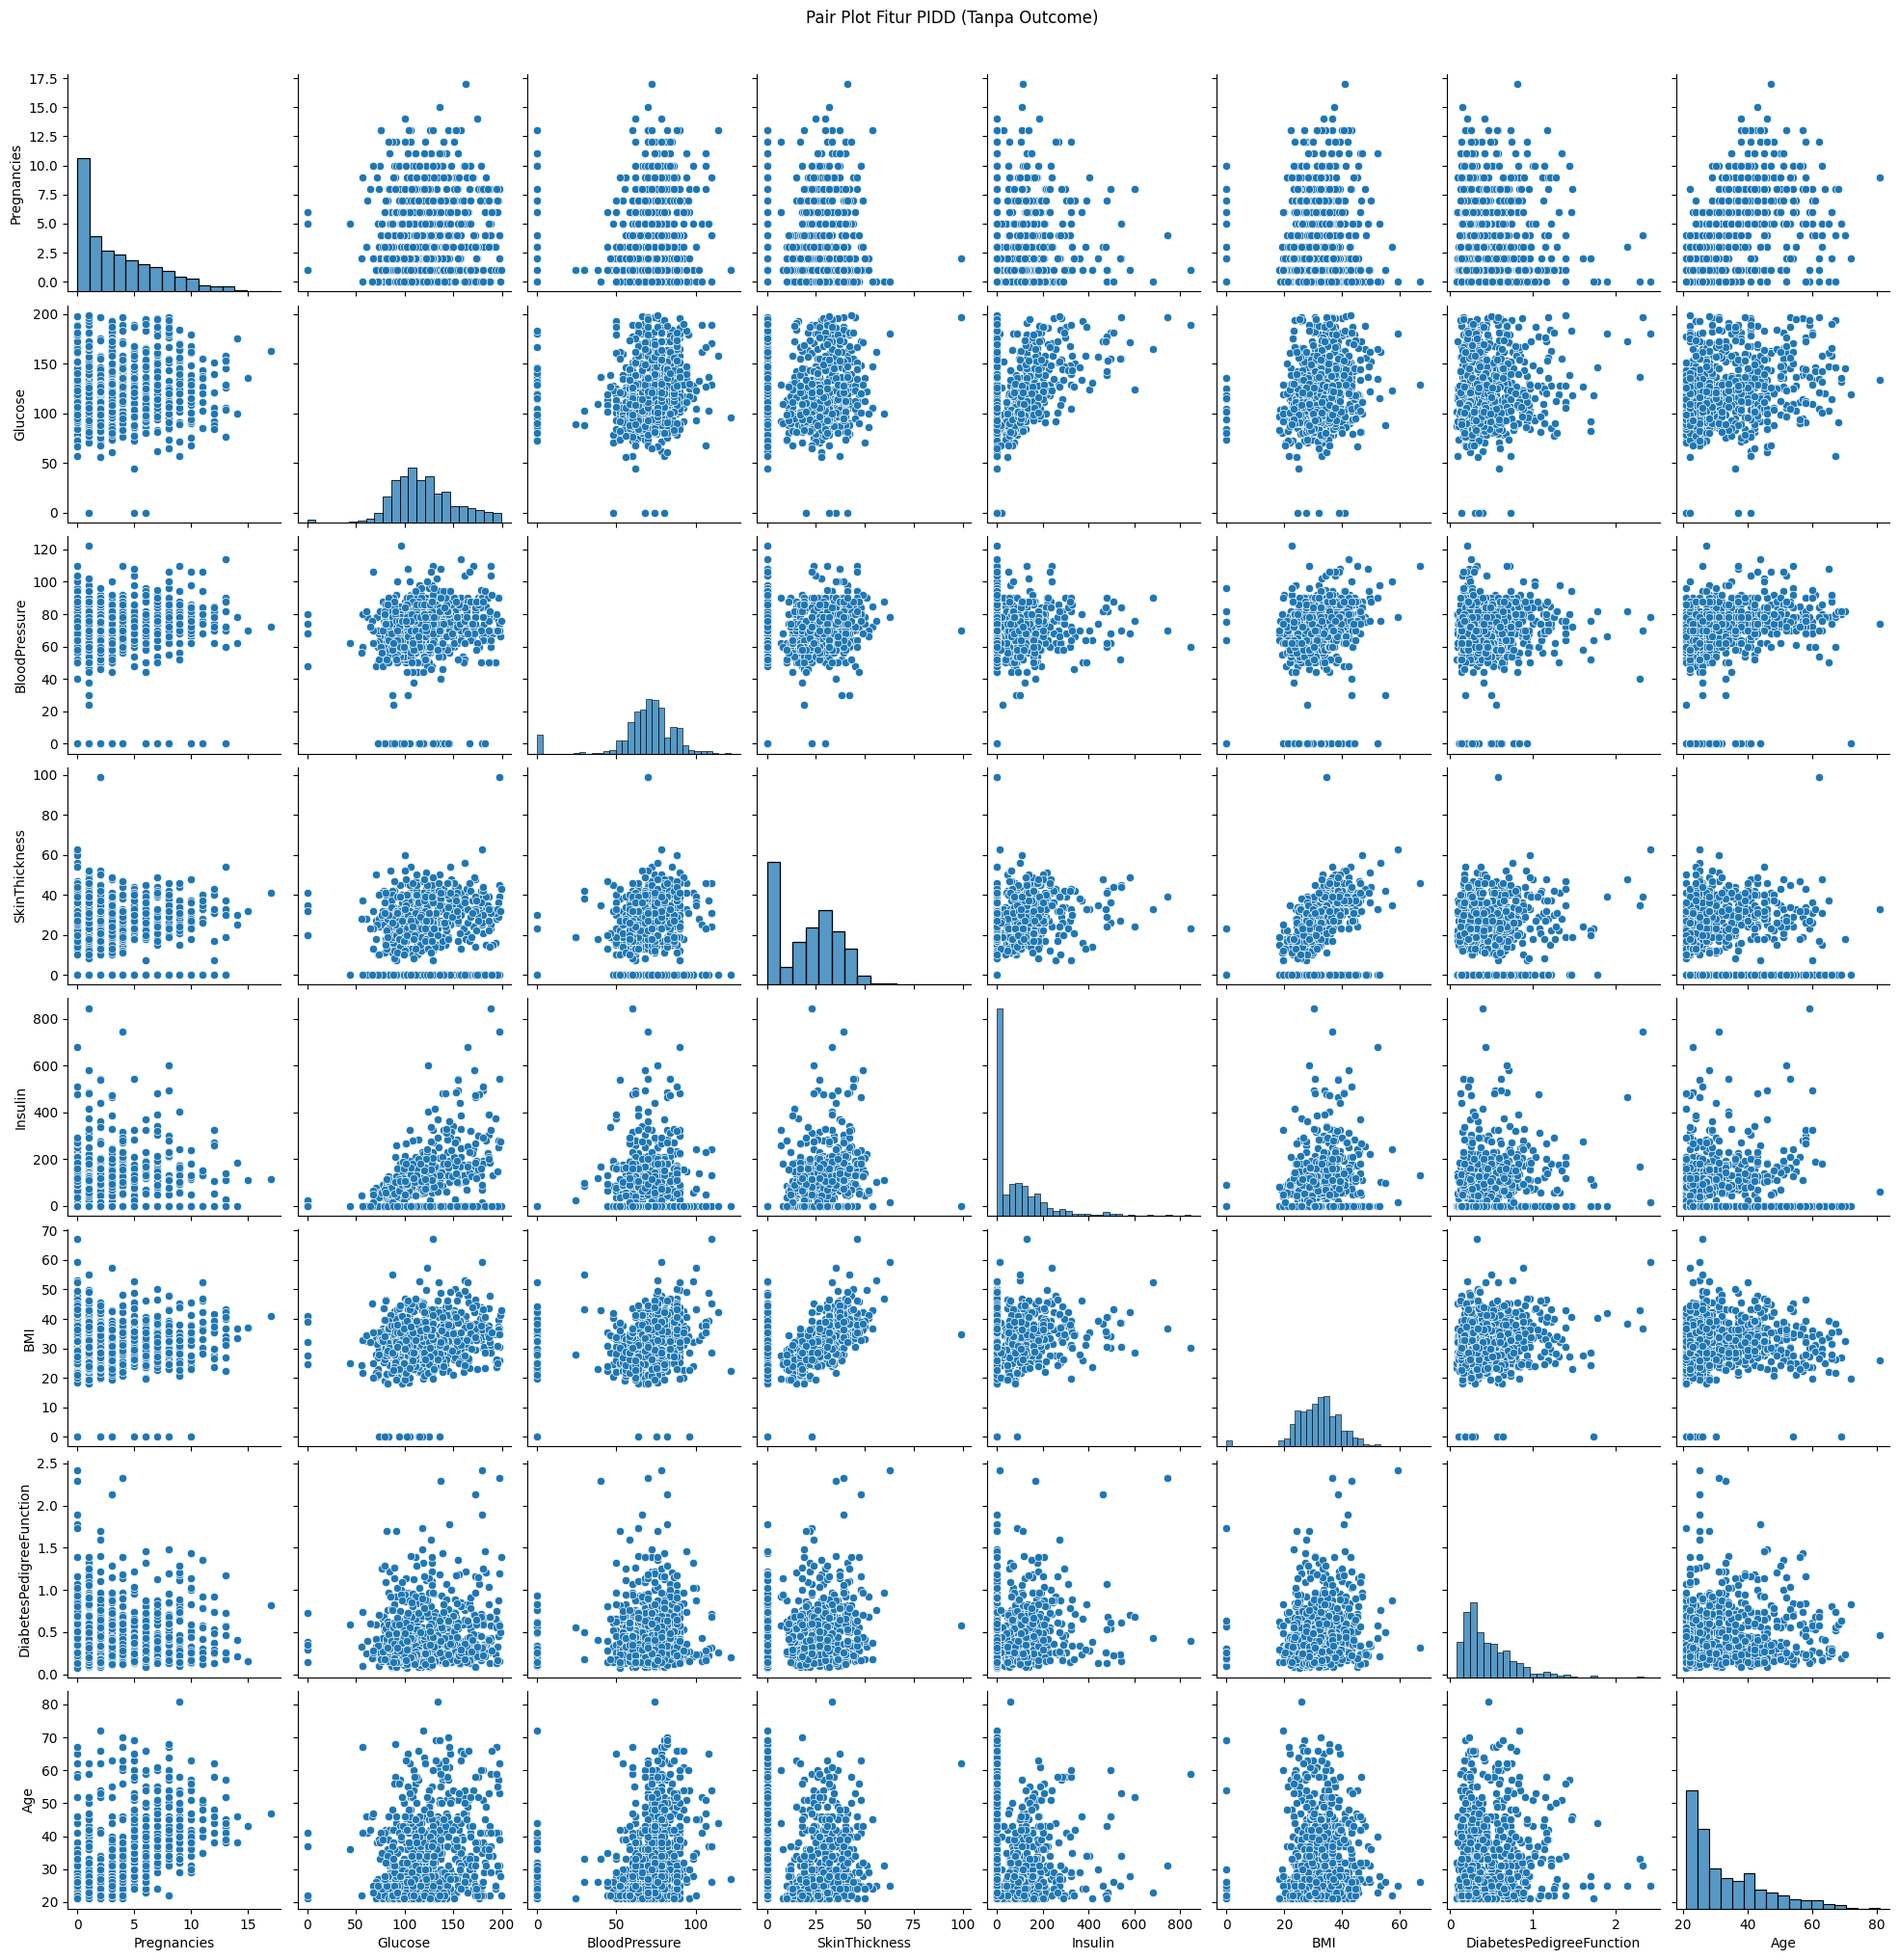

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus kolom 'Outcome' dari dataframe
df_without_outcome = df.drop(columns=['Outcome'])

# Membuat pair plot untuk fitur kecuali 'Outcome'
sns.pairplot(df_without_outcome)
plt.suptitle('Pair Plot Fitur PIDD (Tanpa Outcome)', y=1.02)  # Memberikan judul
plt.show()

# Visualisasi Histogram

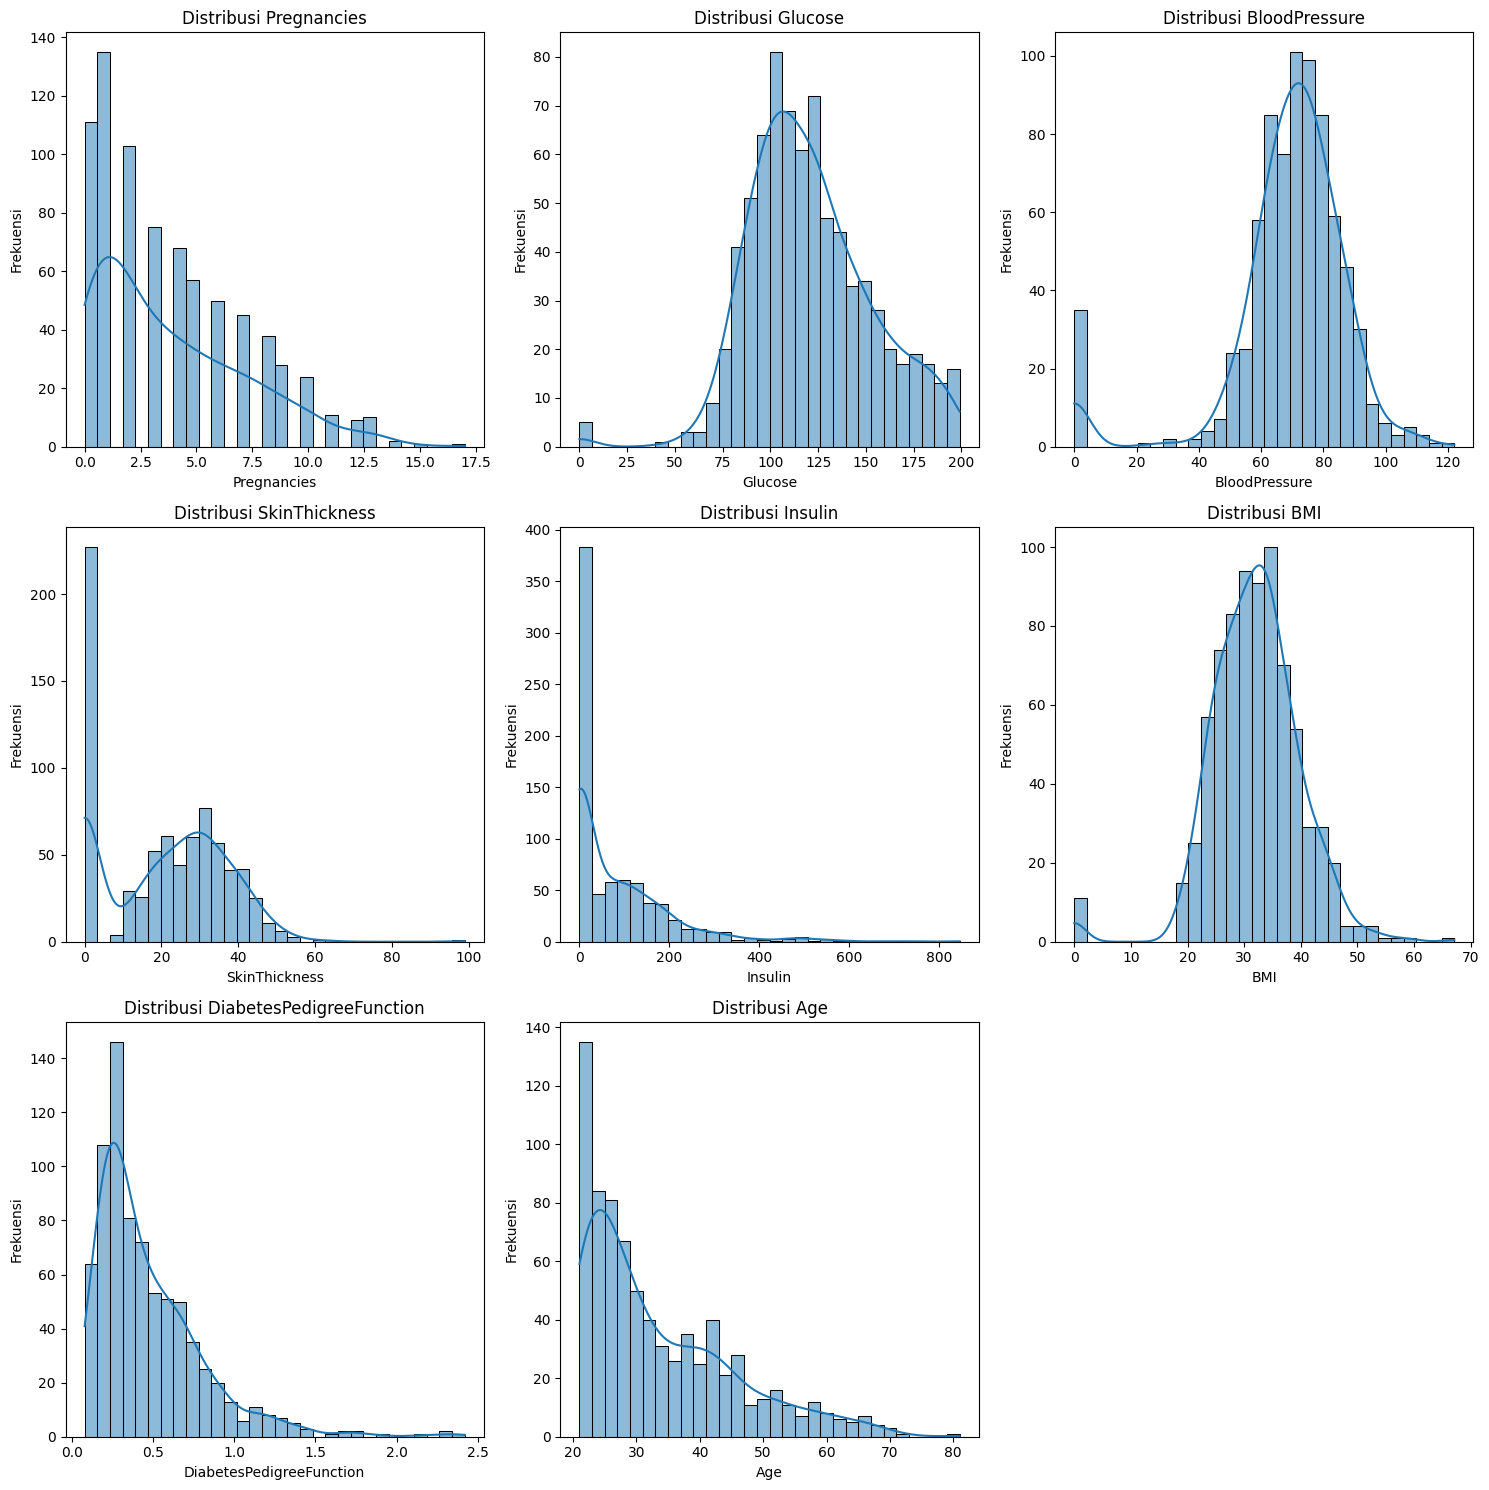

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghapus kolom 'Outcome' dari dataframe
df_without_outcome = df.drop(columns=['Outcome'])

# Menentukan jumlah kolom per baris
columns_per_row = 3

# Menentukan jumlah baris yang dibutuhkan
num_columns = len(df_without_outcome.columns)
num_rows = (num_columns // columns_per_row) + (num_columns % columns_per_row > 0)

# Membuat subplots untuk menampilkan 3 plot per baris
fig, axes = plt.subplots(num_rows, columns_per_row, figsize=(15, 5 * num_rows))

# Meratakan axes jika hanya ada satu baris
axes = axes.flatten()

# Menampilkan histogram untuk setiap kolom kecuali 'Outcome'
for i, column in enumerate(df_without_outcome.columns):
    sns.histplot(df_without_outcome[column], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribusi {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frekuensi')

# Jika jumlah fitur tidak cukup untuk mengisi semua subplots, sembunyikan subplot kosong
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Menyesuaikan layout agar tidak overlap
plt.tight_layout()
plt.show()


# Membagi Dataset Berdasarkan Tipe Data

In [10]:
import pandas as pd

# Membagi kolom berdasarkan tipe data
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns  # Kolom numerik
categorical_features = df.select_dtypes(include=['object', 'category']).columns  # Kolom kategorikal

# Khusus fitur Outcome sebagai kategorikal
categorical_features = list(categorical_features)  # Konversi ke list
if 'Outcome' in df.columns:
    categorical_features.append('Outcome')  # Tambahkan fitur 'Outcome' sebagai kategorikal
    numerical_features = numerical_features.drop('Outcome')  # Hapus 'Outcome' dari fitur numerik

# Data Numerik

In [11]:
print("Kolom Numerik:")
print(numerical_features)
df_numerical = df[numerical_features]
print("\nDataset Numerik:")
print(df_numerical.head())

Kolom Numerik:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

Dataset Numerik:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  


# Data Kategorikal

In [12]:
print("\nKolom Kategorikal:")
print(categorical_features)
df_categorical = df[categorical_features]
print("\nDataset Kategorikal:")
print(df_categorical.head())


Kolom Kategorikal:
['Outcome']

Dataset Kategorikal:
   Outcome
0        1
1        0
2        1
3        0
4        1


# Deteksi Outlier dengan IQR

Jumlah outlier di fitur 'Pregnancies': 4
Jumlah outlier di fitur 'Glucose': 5
Jumlah outlier di fitur 'BloodPressure': 45
Jumlah outlier di fitur 'SkinThickness': 1
Jumlah outlier di fitur 'Insulin': 34
Jumlah outlier di fitur 'BMI': 19
Jumlah outlier di fitur 'DiabetesPedigreeFunction': 29
Jumlah outlier di fitur 'Age': 9


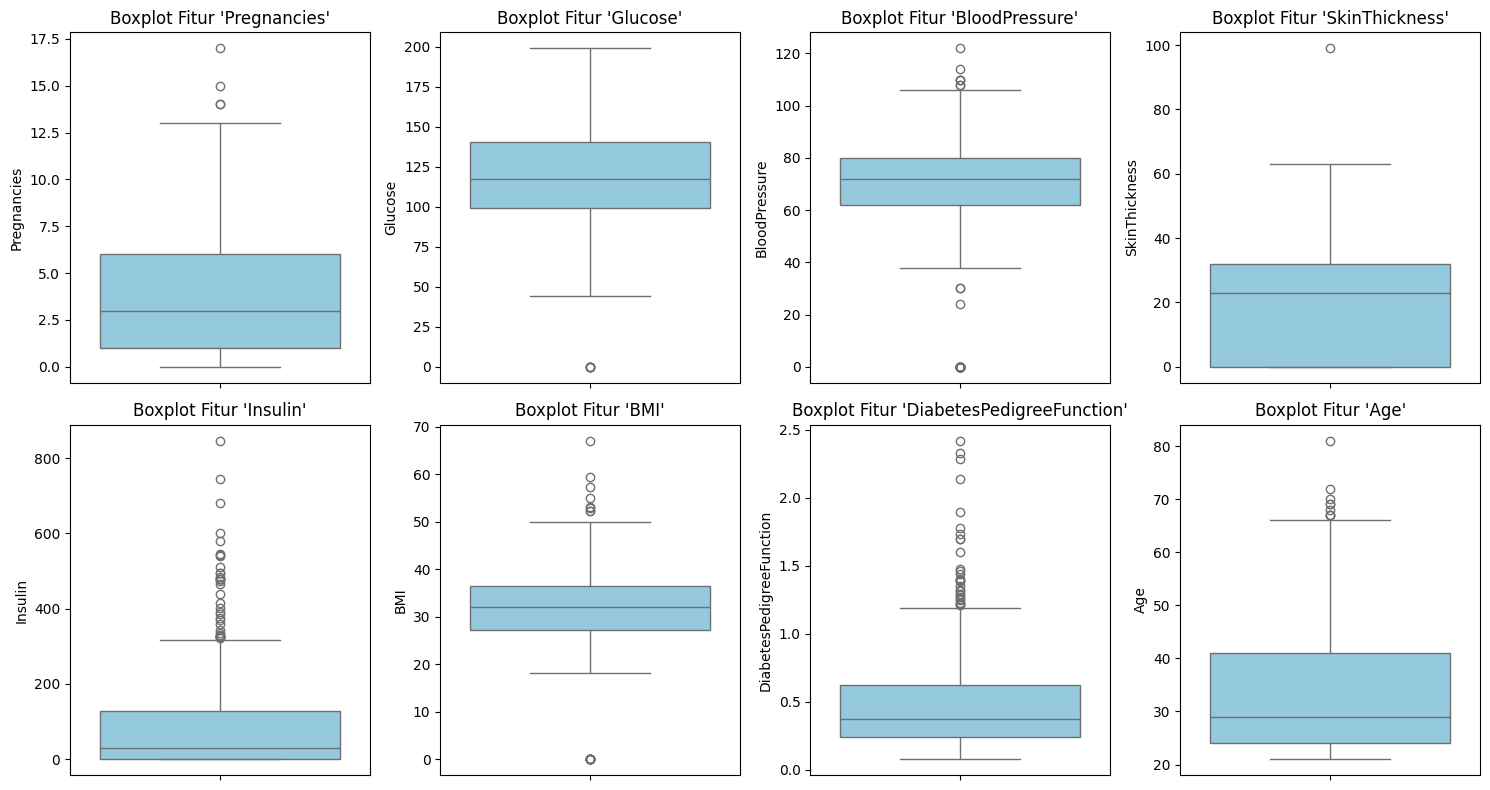

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus kolom target 'Outcome' untuk analisis outlier
df_numerical = df.drop(columns=['Outcome'])

# Fungsi untuk mendeteksi outlier menggunakan IQR
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)  # Kuartil pertama
    Q3 = data.quantile(0.75)  # Kuartil ketiga
    IQR = Q3 - Q1  # Rentang antar-kuartil
    lower_bound = Q1 - 1.5 * IQR  # Batas bawah
    upper_bound = Q3 + 1.5 * IQR  # Batas atas
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Mendeteksi outlier untuk setiap fitur numerik
for column in df_numerical.columns:
    outliers = detect_outliers_iqr(df_numerical[column])
    num_outliers = outliers.sum()
    print(f"Jumlah outlier di fitur '{column}': {num_outliers}")

# Visualisasi outlier menggunakan Boxplot
plt.figure(figsize=(15, 8))
for i, column in enumerate(df_numerical.columns):
    plt.subplot(2, (len(df_numerical.columns) + 1) // 2, i + 1)
    sns.boxplot(y=df_numerical[column], color='skyblue')
    plt.title(f"Boxplot Fitur '{column}'")
plt.tight_layout()
plt.show()

# Membagi Dataset Menjadi Data Training dan Data Testing

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df.drop(columns=['Outcome'])  # Semua fitur numerik dan lainnya
y = df['Outcome']  # Target (kolom kategorikal 'Outcome')

# Membagi dataset menjadi data training dan testing (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menggabungkan kembali fitur numerik dan target untuk data training
train_data = pd.concat([X_train, y_train], axis=1)

# Menggabungkan kembali fitur numerik dan target untuk data testing
test_data = pd.concat([X_test, y_test], axis=1)

# Menyimpan data training dan testing ke file CSV
train_data.to_csv('data_training.csv', index=False)
test_data.to_csv('data_testing.csv', index=False)

print("Data Training dan Data Testing berhasil disimpan sebagai dua file CSV.")

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
import pandas as pd

# Import file CSV
train_data = pd.read_csv('data_training.csv')
test_data = pd.read_csv('data_testing.csv')

# Data Training

In [ ]:
print("=== Data Training ===")
print(train_data.head())
print("\nJumlah baris dalam Data Training:", train_data.shape[0])

# Data Testing

In [ ]:
print("\n=== Data Testing ===")
print(test_data.head())
print("Jumlah baris dalam Data Testing:", test_data.shape[0])